# Intro to `pandas` and `geopandas`

There are a very large number of open-source libraries we can import. 

The Python data analysis package `pandas` is a favorite: https://pandas.pydata.org/

Pandas is based on using **Dataframes**. They allow us to store data as panels in  rows and columns. You may have encountered this data structure in R or Matlab. If not, you can think of the approach as similar to how you use a spreadsheet (except with far greater flexibility and power in Python).

In this tutorial, we will focus on manipulation of dataframes using pandas. 

<div class="alert alert-block alert-info">
    
<b>Note:</b> There are several sub-libraries of pandas such as geopandas for geospatial data that you can always harness their power while performing highly specialised tasks. **Remember Google is your friend!**.
</div>

To begin working with dataframes, we first install and import pandas (as we did for packages in previous sessions). 

<div class="alert alert-block alert-warning">

<b>!! Note !!</b> Pandas is not part of most python distribution packages hence it should be installed where it is not available before starting the tutorial. You may need to exit and reinstall. 

</div>

In [ ]:
# Example
# import sys
# !conda install --yes --prefix {sys.prefix} pandas
import pandas as pd

## Creating a `pandas` dataframe

Here we are focusing on ways of creating dataframes. However, in most day-to-day programming, you are likely to work with data in other formats which you can convert to dataframe by a single line of code. 

Nevertheless, dataframes can be created by converting lists to dictionaries and then to a dataframe, as shown in the subsequent steps, using an example of satellite missions. 

First, let's create a list with our information.

In [ ]:
# Example
satellites =['LandSat','EumetSat','Sentinel','PlanetScope','RasCom',\
             'Starlink','Telesat','RadarSat','Alos','KitSat-1','Chollian','Iridium','OneWeb']
year = [1972,1986,2013,2015,2010,2018,2019,1995,2006,1999,2010,1999,2021]
inclination = [99.2,66,98.65,98.1,0.1,53.2,None,98.6,98.16,None,0.2,86.4,86.4]
government = [True,True,True,False,True,False,False,True,None,True,True,False,None]
role = ['Remote sensing','Remote sensing','Remote sensing',\
        'Communication','Communication','Communication','Remote sensing',\
        'Remote sensing','Remote sensing','Communication','Communication',\
        'Remote sensing','Communication',]
satellites

Next, we need to combine the lists into a dictionary:

In [ ]:
# Example
sat_data = {
    'satellite': satellites,
    'year': year,
    'inclination': inclination,
    'government_owned': government,
    'mission': role
}
sat_data

Finally, we convert the dictionary into dataframe using the `pandas` library function `.DataFrame()`.

In [ ]:
# Example
df = pd.DataFrame(sat_data)
df

The prepared dataframe can be converted to other formats such as excel spreadsheet or CSV files, Example;

In [ ]:
# Example
df.to_csv('satellite_missions.csv')

## Exercise

Have a go at manually creating a `pandas` dataframe called 'image_data' using the following:

    - A column called 'id' containing four numbers from 0-3.
    - A column called 'longitude' containing 0.02, 0.05, 0.06 and 0.08.
    - A column called 'latitude' containing 1.54, 1.65, 1.48 and 1.59.
    - A column called 'filename' containing 'multiband0.tiff', 'multiband1.tiff', 'multiband2.tiff' and 'multiband3.tiff'.
    
Write this dataframe to a .csv file called 'my_csv.csv'. 
        

In [ ]:
#Enter your attempt below:
image_data = {
    'id': [0,1,2,3],
    'longitude': [0.02, 0.05, 0.06, 0.08],
    'latitude': [1.54, 1.65, 1.48, 1.59],
    'filename': ['multiband0.tiff', 'multiband1.tiff', 'multiband2.tiff', 'multiband3.tiff'],
}
image_data = pd.DataFrame(image_data)
image_data.to_csv('image_data.csv')

## Accessing data

`pandas` provides a lot of functionality. For example, you can view the first few rows of data using the 'head' function:

In [ ]:
# Example
df.head()

You can view the last few rows of your data using the 'tail' function.

In [ ]:
# Example
df.tail()

You can know how many rows and columns are in your data using the shape function.

In [ ]:
# Example
df.shape

You can know the name of columns by using the column function.

In [ ]:
# Example
df.columns

You can access a single columns using the following syntax.

In [ ]:
# Example
df['satellite']

You can access multiple columns using the following line of code.

In [ ]:
# Example
df[['satellite','year']]

You can access individual rows by specifying the row index, e.g;

In [ ]:
# Example
df.loc[7]

You can access datapoints between a given range by;

In [ ]:
# Example
df.loc[8:10]

You can access data of specific attributes by subsetting. Eg satellites launched in 2010 or after.

In [ ]:
# Example
df[df['year'] >= 2010]

We can also to multiple subsets at the same time. For example, selecting those launched in 2010 or after, and which were select only remote sensing satellites;

In [ ]:
# Example
df[df['year'] >= 2010][df['mission'] == 'Remote sensing']

You can create add a new column to the existing dataframe as follows;

In [ ]:
# Example
df['mission code'] = ''
df

## Exercise

Now let's use the dataframe you created in the first exercise to practise extracting information.

First, print the shape of 'image_data':

#Enter your attempt below:
image_data = {
    'id': [0,1,2,3],
    'longitude': [0.02, 0.05, 0.06, 0.08],
    'latitude': [1.54, 1.65, 1.48, 1.59],
    'filename': ['multiband0.tiff', 'multiband1.tiff', 'multiband2.tiff', 'multiband3.tiff'],
}
image_data = pd.DataFrame(image_data)
image_data.to_csv('image_data.csv')

In [ ]:
#Enter your attempt below:


Now print the top rows of 'image_data' to inspect the contents:

In [ ]:
#Enter your attempt below:


Subset the 'filename' column, convert to a list, and inspect the contents:

In [ ]:
#Enter your attempt below:


Subset only the `longitude` and `latitude` columns, and then use a new function called `.to_dict('records')` to convert the dataframe of coordinates to a list of dicts:

In [ ]:
#Enter your attempt below:


Next subset those rows which have a 'latitude' between 1.5 and 1.6:

In [ ]:
#Enter your attempt below:
image_data[image_data['latitude'] >= 1.5][image_data['latitude'] <= 1.6]

Finally, subset those rows which have a 'longtitude' between 0.05 and 0.1:

In [ ]:
#Enter your attempt below:
image_data[image_data['longitude'] >= 0.05][image_data['longitude'] <= 0.1]

# Intro `geopandas`

The beauty of `geopandas` is that it enables us to manage spatial info using the Python Data Analysis Library: https://pandas.pydata.org

Let's start by installing the package:

In [ ]:
# # Example
# import sys
# !conda install --yes --prefix {sys.prefix} geopandas

## A quick recap on `pandas`

Pandas is a Python package "providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive". 

It provides us with a range of capabilities:

- DataFrame object for data manipulation with integrated indexing.
- Tools for reading and writing data between in-memory data structures and different file formats.
- Data alignment and integrated handling of missing data.
- Reshaping and pivoting of data sets.
- Label-based slicing, fancy indexing, and subsetting of large data sets.
- Data structure column insertion and deletion.
- Group by engine allowing split-apply-combine operations on data sets.
- Data set merging and joining.
- Hierarchical axis indexing to work with high-dimensional data in a lower-dimensional data structure.
- Time series-functionality: Date range generation[6] and frequency conversions, moving window statistics, moving window linear regressions, date shifting and lagging.
- Provides data filtration.




## So what is special about `geopandas`?

"GeoPandas is a project to add support for geographic data to pandas objects. It currently implements GeoSeries and GeoDataFrame types which are subclasses of pandas.Series and pandas.DataFrame respectively. GeoPandas objects can act on shapely geometry objects and perform geometric operations."

See the Git repo for more information: https://github.com/geopandas/geopandas

The GeoPandas dataframe holds a geometry column which enables cartesian geometry operations (meaning it can interpret pairs of numerical coordinates in space). 

The coordinate reference system (crs) can be stored as an attribute on an object, and is automatically set when loading from a file. Objects may be transformed to new coordinate systems with the `to_crs()` method. 

Here we will cover the following basic operations:

- Reading data to a geopandas dataframe
- Manipulating column data 
- Creating a new column
- Changing coordinate reference systems
- Writing data to a geopandas dataframe


## Making a shape from scratch

In [ ]:
## Here is a geojson point in space, which we will create. 
gmu_point = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': (-77.31540, 38.83630),
        },
        'properties': {}
    }

my_list_of_dicts = []

my_list_of_dicts.append(gmu_point)

## Now we can specify a GeoDataFrame, providing the list of dicts and the CRS.
output = gpd.GeoDataFrame.from_features(my_list_of_dicts, crs='epsg:4326')

## Finally, let's write this GeoDataFrame to a shapefile. 
output.to_file('example_point.shp', crs='epsg:4326')


# Exercise

Create a polygon for GMU's Fairfax campus. 

You will need coordinates for the edge of campus, which you will then convert to a shapefile and export.

In [ ]:
# Enter your attempt here


### Reading vector shapefile data to a GeoPandas dataframe

Let's read in the shapefile for GMU. 

To load this in, we can find the current folder using the `os` package which we previously used, as follows, via the `getcwd` function:

In [ ]:
import os

## getcwd stands for 'get current working directory'
current_dir = os.getcwd()

print(current_dir)    


The `current_dir` variable is merely a string of the directory path which we can manipulate.

Thus, from here we can navigate up and down directories by adding on new parts to this string. Our trusty double period, which we previously used (`..`), enables us to navigate up the file path. For example:

In [ ]:
## getcwd stands for 'get current working directory'
current_dir = os.getcwd()

path = current_dir + '/GMU.shp'

print(path)    

Now we're ready to read in the data using the path we've specified.

Let's first load GeoPandas which should already be installed in your environment. 

Then we can use the GeoPandas function `read_file` and provide the following arguments:
- `path` which contains the path to the shapefile we want to load, and
- `crs` which states the coordinate reference system


In [ ]:
import geopandas as gpd

#load the file as the variable named data
data = gpd.read_file(path, crs='epsg:4326') 
print(data)

## GeoPandas Examples

GeoPandas provide us with some great functionality, for example, we can change the crs as follows:

In [ ]:
# The previous crs was in degrees (epsg:4326), so let's change to meters ('epsg:3857')
data = data.to_crs('epsg:3857')
print(data)

Now we are in meters, we can take the area of this shape as follows:

In [ ]:
# Due to our current CRS, the area will be in square meters
data['area'] = data['geometry'].area 
print(data)

The beauty is we can manipulate this as a normal pandas dataframe.

So let's for example, convert our square meters into square kilometers (which requires us to divide by 1e6)

Remember, we can select a variable by using the square parentheses to index (e.g. `data['area']` gets the area column), and then create a new column this way too (e.g. `data['area_km2']` is the new column we wish to make).

In [ ]:
data['area_km2'] = data['area'] / 1e6
print(data['area_km2'])

We can see the whole dataframe structure with our new column, as follows:

In [ ]:
print(data)

We are able to loop over any content in a GeoDataFrame the same way we would a normal DataFrame, by using the `iterrows()` function, as follows:

In [ ]:
for row in data.iterrows():
    print(row)

This means we can access and print specific parts of each row. 

The important thing to remember is that you have the row index (here it's a zero) and then the actual row information.

For example, we can break out the row index here using `[0]`, and the row information using `[1]`:

In [ ]:
for row in data.iterrows():
    
    ##this will print our row index
    print(row[0]) 
    print('')
    print('')
    ##this will print our row information
    print(row[1])

We can then access just the geometry as follows:

In [ ]:
for row in data.iterrows():
    
    ##this will print our row geometry
    print(row[1]['geometry'])

And we can carry out any manipulations we want in this loop, such as taking the area (let's reuse this as it used it before, so you will be familiar):

In [ ]:
for row in data.iterrows():
    
    ##this will print our row geometry
    area_km2 = (row[1]['geometry'].area / 1e6)
    
    ##this will round our area to 1 decimal place
    area_km2 = round(area_km2, 1)
    
    print("The area of GMU campus is {} square kilometers".format(area_km2))

We can loop over our GeoDataFrame and extract any information we want, and write it to a DataFrame. For example:

In [ ]:
output = []

for row in data.iterrows():
    
    ##this will print our row geometry
    area_km2 = (row[1]['geometry'].area / 1e6)

    ##we can append this information to a list as a dictionary
    output.append({
        'index': row[0],
        'area_km2': area_km2,
    })

print(output)

Once we have this list of dictionaries we can create a pandas dataframe from it as follows:

In [ ]:
import pandas as pd

output = []

for row in data.iterrows():
    
    ##this will print our row geometry
    area_km2 = (row[1]['geometry'].area / 1e6)

    ##we can append this information to a list as a dictionary
    output.append({
        'index': row[0],
        'area_km2': area_km2,
        'any_other_properties': 'test_properties',
    })

## Let's convert our list of dicts to a pandas dataframe
output = pd.DataFrame(output)

## Write the dataframe to a .csv file
output.to_csv('output.csv')

print('Completed writing "output.csv"')

## NumPy Arrays

These are the real workhorse of data structures for engineering applications and scientific computing and are formally called *ndarray*.

It is similar to list but all elements are of the same type. 

Numpy arrays can be acreated in four different ways as follows;
1. Converting an existing list using **array** python function. 
2. Using NumPy **linspace** and **logspace** functions.
3. Using NumPy **arrange** function.
4. Creating an array of **zeros** and **ones** functions.

We will need to import the numpy library to use these functions.

In [ ]:
import numpy as np

##### Converting an existing list using **array** python function.  

In [ ]:
a = [10,20,30,40,50,60,70,80,90]
a

In [ ]:
b = np.array(a)
b

The above steps can be written in one step as follows

In [ ]:
c = np.array([2,4.5,-6,10])
c

##### Using NumPy **linspace** and **logspace** functions.

**Linspace** creates an array N of evenly spaced points between a starting and ending point. 

The function name stands for linear spacing.

It takes the general from, *linspace(start,stop,N)*.

If N is not provided, then it is automatically set to N=50.

In [ ]:
# Example
# Here we are creating a sequence of 5 values between 0 to 20.
np.linspace(0,20,5)

**Logspace** produces evenly spaced points on a logarithmic scale.

Arguments are the same as those for linspace except that the *start* and *stop* refer to a power of 10. 

In [ ]:
# Example
np.logspace(0,20,5)

##### Using NumPy **arange** function.

The NumPy *arange* function is similar to python's *range* function and takes the general form of *arange(start,stop,step)*.

By default step=1 and start=0.

In [ ]:
# Example
# A sequenced array between 0 and 20, incrementing by 2. 
np.arange(0,20,2)

In [ ]:
# Example
# A sequenced array between 0 and 20, incrementing by 1.5. 
np.arange(0,20,1.5)

## Conditionals 

These are series of statements that allow a computer program to perform different actions based on whether some requirement or set of instructions is true or false.

It therefore allows the programmer to control the flow of the program. 

We are going to look at **if**, **elif** and **else** statements among others in this tutorial. 

Here is an example:

In [ ]:
for i in range(0,5):
    if i == 2:
        print(i)

As expected, the code works but lets explain it line by line;
    - First we create a for loop to iterate over the range 0-5.
    - Secondly, we specify that if i is equal to the number 2, the loop should proceed.
    - Finally, we print i.

This logic results in us printing the number 2. 

We are also able to export the implication of more nuanced logic.

In [ ]:
for i in range(0,5):
    if i == 0:
        print('this is 0')
    elif i == 1:
        print('this is 1')
    else:
        print('the remainer must be 2, 3 or 4')

So this time the conditional logic is a bit more complicated:
    - First we create a for loop to iterate over the range 0-5.
    - Secondly, we specify that if i is equal to the number 0, the loop should proceed, and print the given statement.
    - If i is not equal to 0, the next step is to see if i is equal to 1. If so, print the given statement. 
    - For all other numbers which therefore cannot be 1 oe 2, print the given statement.

This logic results in us printing the following set of statements:
    
    this is 0
    this is 1
    the remainer must be 2, 3 or 4
    the remainer must be 2, 3 or 4
    the remainer must be 2, 3 or 4


We have lots of conditional operators available to us!

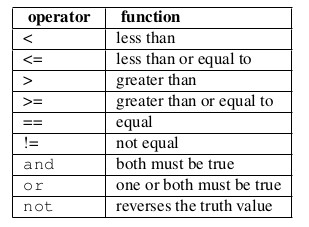

## Loops 

Loops allow us to repeatedly iterate over a piece of programing logic. 

They are useful for performing repetitive tasks very quickly.

There are two kinds of python loops (**for** and **while**).

### For Loops 

It takes the general form of;

In [ ]:
for <itervar> in <sequence>:
    <body>

Where *intervar* is a variable, *sequence* is a sequence such as a string, array, list or even a function and *body* a block of commands or tasks to repeated. 
    
The body has to be indented from the rest of the code to define the extent of the loop.
    
For example let us print the individual states in the following list:

In [ ]:
for state in ['Virginia', 'Georgia','New Jersey','New York']:
    print(state)
print('')
print('-- Complete')

Lets explain how the code works.

The *iteration variable* or *loop index* **state** is set equal to the first element in the list, "Virginia", and then the line in the indented body is executed. The loop then cycles through all the elements of the list, and moves on to the code that follows the for loop and prints **-- Complete**

#### Using range

A 'for loop' can also be used with the Python **range** function.

For example, let's loop through all the numbers in the range 1-5.

In [ ]:
for i in range(1,5):
    print(i)

For loops are handy for complicated tasks, and are often used to iterate over functions.

Example: Calculate the area for a rectangle of width 10, but an increasing length of 10-20 meters.

In [ ]:
# Example

for length in range(10,20):
    w = 10
    area = w*length
    print(area)

### While Loops

It takes the general form;

In [ ]:
while <condition>:
    <body>

Where the *condition* is a statement that can be either be True or False and the *body* is a series of Python commands that is executed repeatedly until the *condition* becomes false. Therefore, somewhere in the *body* of the loop, the truth value of the *condition* changes and the loop ceases to iterate further.

Let us take the following example:

In [ ]:
increment = 0

while increment < 4:
    print(increment)
    increment += 1

Let go over this in steps to explain the code;

   - We initially set the increment to be zero. 
   - We then specify that while the increment is below 4, the loop should continue. 
   - On each iteration, print the increment. 
   - Then add 1 to the current increment value on each loop. 
   - When the increment eventually equals 4, the loop ceases to operate. 

## Functions 

By developing **user-defined functions** we can avoid repeating code, and make it easier for us to compartmentalize problems. 

User-defined functions are similar to the previous in-built or package functions that we have been using.

We can write a function to divide two numbers. 

In [ ]:
def my_division_function(x, y):
    
    result = x / y
    
    return result

my_division_function(6, 2)

The function begins with the word **def** followed by the name of the function. 

A list of arguments is enclosed within the brackets.

We then terminate the function with a colon. This is the required Python format for a function. We also need to make sure the next line is indented using either a tab or four spaces.

Our function then divides x by y, and allocates the outcome to the variable name **result**, before returning this variable.